In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:

# make path for the CVC file from folder 
csv_path = "vgsales.csv"

In [9]:
# Read for the CVC file from folder and store into variable 
df = pd.read_csv(csv_path)


In [10]:
# is used to display the first few rows of a DataFrame named df. 
# This command is often used during data exploration to quickly inspect the structure 
#  and contents of a DataFrame
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,28,2006,12,360,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,13,1985,5,360,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,28,2008,7,360,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,28,2009,12,360,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,7,1996,8,360,11.27,8.89,10.22,1.00,31.37


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  int64  
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  int64  
 5   Publisher     16598 non-null  int64  
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 1.4+ MB


In [6]:
# Convert 'Publisher', 'Genre', and 'Platform' columns into numeric form using label encoding
label_encoder = LabelEncoder()
df['Publisher'] = label_encoder.fit_transform(df['Publisher'])
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Platform'] = label_encoder.fit_transform(df['Platform'])

# Save the updated DataFrame to a new CSV file
df.to_csv("vgsales.csv", index=False)

In [7]:
columns = df.columns

print("All column names:")
for column in columns:
    print(column)

All column names:
Rank
Name
Platform
Year
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales


In [8]:
# Drop rows with missing values
df.dropna(inplace=True)

In [9]:
# Step 2: Identify numeric columns
numeric_columns = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales']
print("Numeric Columns:", numeric_columns)

Numeric Columns: ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales']


In [10]:
# Step 2: Clean up the dataset
# Drop rows with missing values
df.dropna(subset=numeric_columns, inplace=True)

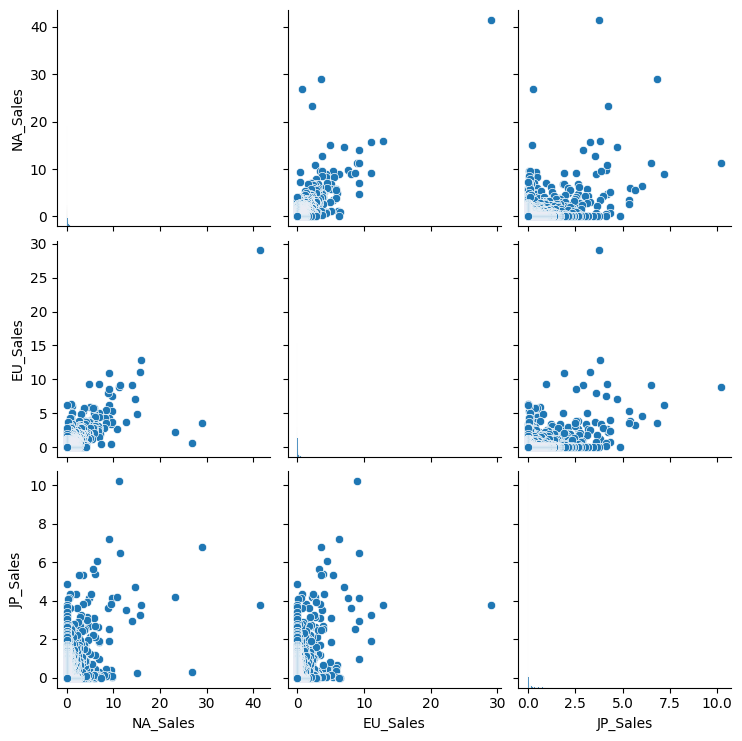

In [11]:
# Step 3: Visualize the data to check for linear trend
sns.pairplot(df[numeric_columns])
plt.show()

In [12]:
# Step 4: Split the dataset into training and testing sets
X = df[numeric_columns]  # Features
y = df['Global_Sales']   # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Step 5: Fit the data to a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

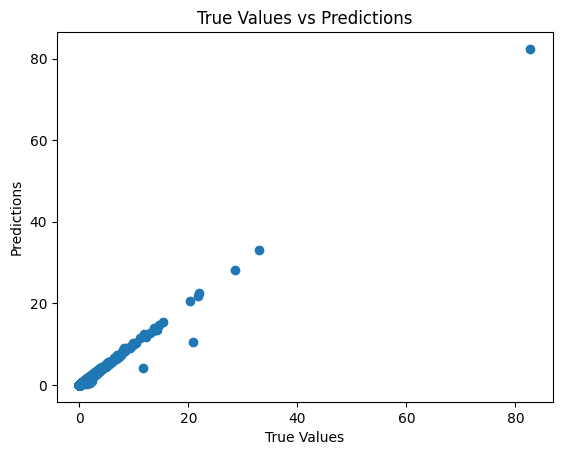

In [14]:
# Step 6: Visualize the predictions against the true values using a scatter plot
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

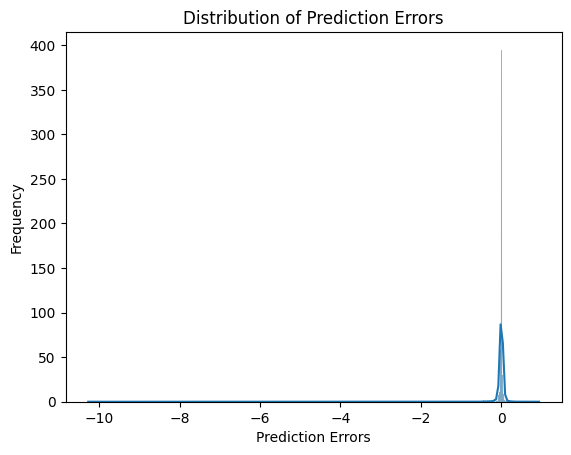

In [15]:
# Check the distribution of prediction errors
errors = y_pred - y_test
sns.histplot(errors, kde=True)
plt.xlabel("Prediction Errors")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

In [16]:
# Step 7: Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

In [17]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error (MAE): 0.030435790956379234
Mean Squared Error (MSE): 0.03835360192623339
Root Mean Squared Error (RMSE): 0.1958407565504009
R-squared (R²): 0.98853277117079


In [18]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

# Function to predict global sales using the model
def predict_sales():
    try:
        # Get input values from the entry fields
        year = int(year_entry.get())
        na_sales = float(na_sales_entry.get())
        eu_sales = float(eu_sales_entry.get())
        jp_sales = float(jp_sales_entry.get())
        
        # Predict global sales using the model
        global_sales = model.predict([[year, na_sales, eu_sales, jp_sales]])
        
        # Display the predicted global sales
        result_label.config(text=f"Predicted Global Sales: {global_sales[0]:.2f} million")
        
    except ValueError:
        # Display an error message if input values are not valid
        messagebox.showerror("Error", "Please enter valid numeric values.")

# Create the main application window
root = tk.Tk()
root.title("Video Game Sales Prediction")

# Create input fields for Year, NA Sales, EU Sales, and JP Sales
year_label = ttk.Label(root, text="Year:")
year_label.grid(row=0, column=0, padx=5, pady=5, sticky="e")
year_entry = ttk.Entry(root)
year_entry.grid(row=0, column=1, padx=5, pady=5)

na_sales_label = ttk.Label(root, text="NA Sales (million):")
na_sales_label.grid(row=1, column=0, padx=5, pady=5, sticky="e")
na_sales_entry = ttk.Entry(root)
na_sales_entry.grid(row=1, column=1, padx=5, pady=5)

eu_sales_label = ttk.Label(root, text="EU Sales (million):")
eu_sales_label.grid(row=2, column=0, padx=5, pady=5, sticky="e")
eu_sales_entry = ttk.Entry(root)
eu_sales_entry.grid(row=2, column=1, padx=5, pady=5)

jp_sales_label = ttk.Label(root, text="JP Sales (million):")
jp_sales_label.grid(row=3, column=0, padx=5, pady=5, sticky="e")
jp_sales_entry = ttk.Entry(root)
jp_sales_entry.grid(row=3, column=1, padx=5, pady=5)

# Create a button to predict global sales
predict_button = ttk.Button(root, text="Predict Global Sales", command=predict_sales)
predict_button.grid(row=4, column=0, columnspan=2, padx=5, pady=10)

# Create a label to display the predicted global sales
result_label = ttk.Label(root, text="")
result_label.grid(row=5, column=0, columnspan=2, padx=5, pady=5)

# Run the main event loop
root.mainloop()


2024-03-20 10:56:56.531 Python[2968:73124] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


: 